In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

In [ ]:
# dfGossipR=pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/FakeNewsNet/gossipcop_real.csv")
# dfGossipR["label"] = 0

# dfGossipF = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/FakeNewsNet/gossipcop_fake.csv")
# dfGossipF["label"] = 1
# # dfGossip=dfGossipF.append(dfGossipR,ignore_index = True)

# dfPolitiR=pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/FakeNewsNet/politifact_real.csv")
# dfPolitiR["label"] = 0

# dfPolitiF = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/FakeNewsNet/politifact_fake.csv")
# dfPolitiF["label"] = 1
# # dfPoliti=dfPolitiF.append(dfPolitiR,ignore_index = True)

# dfTrue = dfGossipR.append(dfPolitiR,ignore_index = True).sample(1000)
# dfFalse = dfGossipF.append(dfFalse,ignore_index = True).sample(1000)

# # dff=dfGossip.append(dfPoliti,ignore_index = True)
# dff=dfTrue.append(dfFalse,ignore_index = True)
dff = pd.read_csv("/content/drive/Shareddrives/[FYP] Fake News Detection/Kirishnni Emotion Extraction/Results/WelFake/Welfake_Explainability.csv")

# dff2 = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Results/final_predictions_1000_normalised.csv")
# dff2 = pd.read_csv("/content/drive/MyDrive/final_predictions_1000.csv")

df = dff

# dff.drop(["Unnamed: 0"],axis=1 , inplace=True)
# dff.drop(["id","news_url", "tweet_ids"],axis=1 , inplace=True)

# dfkaggletrain=pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/kaggle-fake-news/train.csv")
# dfkaggletest=pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/kaggle-fake-news/test.csv")
# df=dfkaggletrain.append(dfkaggletest,ignore_index = True)
# dfkagglefake_news = dfkaggletrain
# dfkagglefake_news["source"]= "kaggle"

# dftrue = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/ISOT/True.csv")
# dffake = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/ISOT/Fake.csv")
# dftrue["label"]=0
# dffake["label"]=1
# df=dftrue.append(dffake,ignore_index = True)
# df.drop(["subject","date"],axis=1 , inplace=True)

# dfISOT["source"]="isot"

# dfFakeddit = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/Fakeddit/all_validate.tsv", sep='\t')
# df = dfFakeddit.filter(['title','2_way_label'], axis=1)

In [ ]:
# df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62611 entries, 0 to 62610
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                62611 non-null  int64  
 1   total_text           62611 non-null  object 
 2   emotion_score_dict   62611 non-null  object 
 3   highest_eight_label  62611 non-null  object 
 4   anger                62611 non-null  float64
 5   anticipation         62611 non-null  float64
 6   disgust              62611 non-null  float64
 7   fear                 62611 non-null  float64
 8   joy                  62611 non-null  float64
 9   sadness              62611 non-null  float64
 10  surprise             62611 non-null  float64
 11  trust                62611 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 5.7+ MB


In [ ]:
df.head()

,label,total_text,emotion_score_dict,highest_eight_label,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1,law enforcement on high alert following threat...,"{'anticipation': 0.703, 'trust': 0.83, 'joy': ...",anger,10.288,0.703,5.530,7.967,2.139,2.940,5.304,0.830
1,1,unbelievable obamas attorney general says most...,"{'disgust': 1.462, 'sadness': 1.463, 'fear': 1...",joy,2.325,3.324,1.462,1.939,16.889,1.463,2.731,7.473
2,0,bobby jindal raised hindu uses story of christ...,"{'sadness': 1.733, 'fear': 2.289, 'disgust': 2...",joy,3.164,2.739,2.369,2.289,13.161,1.733,3.737,5.149
3,1,satan russia unvelis an image of its terrifyin...,"{'joy': 0, 'trust': 0.275, 'anticipation': 0.6...",anger,24.928,0.683,8.398,6.862,0.000,4.495,0.804,0.275
4,1,about time christian group sues amazon and spl...,"{'trust': 0, 'anticipation': 1.561, 'joy': 1.7...",anger,14.560,1.561,8.999,4.245,1.700,4.550,2.530,0.000


In [ ]:
# # dfFinal = pd.concat([df.drop(['8_emo_dict'], axis=1), df['8_emo_dict'].apply(pd.Series)], axis=1)
# import ast

# def str_to_dict(emot_dict):
#   return ast.literal_eval(emot_dict)

# df['8_emotions'] = df['8_emo_dict'].apply(str_to_dict)

In [ ]:
# dfFinal = pd.concat([df.drop(['8_emotions'], axis=1), df['8_emotions'].apply(pd.Series)], axis=1)
# dfFinal.info()

In [ ]:
dfFinal = df
# dfFinal = dfFinal.loc[:, ~dfFinal.columns.str.contains('^Unnamed')]
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62611 entries, 0 to 62610
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                62611 non-null  int64  
 1   total_text           62611 non-null  object 
 2   emotion_score_dict   62611 non-null  object 
 3   highest_eight_label  62611 non-null  object 
 4   anger                62611 non-null  float64
 5   anticipation         62611 non-null  float64
 6   disgust              62611 non-null  float64
 7   fear                 62611 non-null  float64
 8   joy                  62611 non-null  float64
 9   sadness              62611 non-null  float64
 10  surprise             62611 non-null  float64
 11  trust                62611 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 5.7+ MB


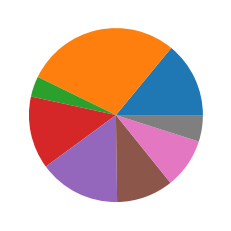

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


y = np.array([dataFake["disgust"][1], dataFake["anger"][1], dataFake["anticipation"][1], dataFake["fear"][1],dataFake["joy"][1],dataFake["sadness"][1],dataFake["surprise"][1],dataFake["trust"][1]])

plt.pie(y)
plt.show()

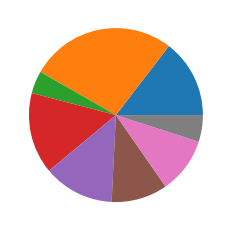

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


y = np.array([dataTrue["disgust"][1], dataTrue["anger"][1], dataTrue["anticipation"][1], dataTrue["fear"][1],dataTrue["joy"][1],dataTrue["sadness"][1],dataTrue["surprise"][1],dataTrue["trust"][1]])

plt.pie(y)
plt.show()

#Analysis

In [ ]:
# dfFinal.drop(["14_emo_dict", 'highest_14_emo_label','highest_8_emo_label'],axis=1 , inplace=True)
# dfFinal.drop(['highest_8_emo_label','8_emo_dict'],axis=1 , inplace=True)

In [ ]:
dfFinal.corr()

,label,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
label,1.000000,0.080965,-0.021947,0.017345,-0.043828,0.059988,0.042349,-0.045292,0.019779
anger,0.080965,1.000000,-0.611497,0.655941,0.085611,-0.554503,0.145882,-0.321058,-0.447981
anticipation,-0.021947,-0.611497,1.000000,-0.711372,-0.069155,0.620832,-0.408761,0.096422,0.538345
disgust,0.017345,0.655941,-0.711372,1.000000,0.133562,-0.660455,0.313499,-0.157410,-0.536798
fear,-0.043828,0.085611,-0.069155,0.133562,1.000000,-0.536790,0.331223,0.232395,-0.501507
joy,0.059988,-0.554503,0.620832,-0.660455,-0.536790,1.000000,-0.519667,-0.090606,0.722032
sadness,0.042349,0.145882,-0.408761,0.313499,0.331223,-0.519667,1.000000,-0.187703,-0.456707
surprise,-0.045292,-0.321058,0.096422,-0.157410,0.232395,-0.090606,-0.187703,1.000000,-0.182797
trust,0.019779,-0.447981,0.538345,-0.536798,-0.501507,0.722032,-0.456707,-0.182797,1.000000


In [ ]:
fake = dfFinal.loc[dfFinal['label'] == 1]
true = dfFinal.loc[dfFinal['label'] == 0]

In [ ]:
fake

,label,total_text,emotion_score_dict,highest_eight_label,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1,law enforcement on high alert following threat...,"{'anticipation': 0.703, 'trust': 0.83, 'joy': ...",anger,10.288,0.703,5.530,7.967,2.139,2.940,5.304,0.830
1,1,unbelievable obamas attorney general says most...,"{'disgust': 1.462, 'sadness': 1.463, 'fear': 1...",joy,2.325,3.324,1.462,1.939,16.889,1.463,2.731,7.473
3,1,satan russia unvelis an image of its terrifyin...,"{'joy': 0, 'trust': 0.275, 'anticipation': 0.6...",anger,24.928,0.683,8.398,6.862,0.000,4.495,0.804,0.275
4,1,about time christian group sues amazon and spl...,"{'trust': 0, 'anticipation': 1.561, 'joy': 1.7...",anger,14.560,1.561,8.999,4.245,1.700,4.550,2.530,0.000
5,1,dr ben carson targeted by the irs i never had ...,"{'anticipation': 0, 'joy': 0, 'trust': 0.358, ...",anger,34.000,0.000,10.286,7.347,0.000,3.957,1.192,0.358
...,...,...,...,...,...,...,...,...,...,...,...,...
62597,1,racist prick spits on black pair yells n b tch...,"{'anticipation': 0, 'joy': 0, 'trust': 0.308, ...",anger,33.286,0.000,7.498,2.871,0.000,4.734,0.867,0.308
62599,1,bill oreilly destroys liberal pundit on trump ...,"{'anticipation': 0, 'joy': 0, 'trust': 1.301, ...",anger,21.536,0.000,7.624,5.559,0.000,3.295,4.210,1.301
62601,1,florida judge blames rape victim for attending...,"{'joy': 0.449, 'anticipation': 0.7, 'trust': 0...",anger,11.719,0.700,7.960,6.706,0.449,6.483,6.686,0.826
62606,1,wikileaks email shows clinton foundation funds...,"{'anticipation': 0, 'joy': 0, 'surprise': 0.82...",anger,25.500,0.000,9.173,3.008,0.000,7.469,0.820,1.174


In [ ]:
dataFake = fake.describe()
dataFake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         8 non-null      float64
 1   anger         8 non-null      float64
 2   anticipation  8 non-null      float64
 3   disgust       8 non-null      float64
 4   fear          8 non-null      float64
 5   joy           8 non-null      float64
 6   sadness       8 non-null      float64
 7   surprise      8 non-null      float64
 8   trust         8 non-null      float64
dtypes: float64(9)
memory usage: 640.0+ bytes


In [ ]:
dataFake.head()

,label,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
count,27838.0,27838.000000,27838.000000,27838.000000,27838.000000,27838.000000,27838.000000,27838.000000,27838.000000
mean,1.0,10.993535,1.453236,5.364649,5.170639,5.786871,4.042605,3.554788,1.880429
std,0.0,8.095159,1.410127,2.672689,3.558516,9.098625,3.370061,2.586108,2.184540
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,5.290500,0.000000,3.444000,3.036000,0.000000,2.103000,1.744000,0.385250


In [ ]:
dataTrue = true.describe()
dataTrue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         8 non-null      float64
 1   anger         8 non-null      float64
 2   anticipation  8 non-null      float64
 3   disgust       8 non-null      float64
 4   fear          8 non-null      float64
 5   joy           8 non-null      float64
 6   sadness       8 non-null      float64
 7   surprise      8 non-null      float64
 8   trust         8 non-null      float64
dtypes: float64(9)
memory usage: 640.0+ bytes


In [ ]:
dataTrue.head()

,label,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
count,34773.0,34773.000000,34773.000000,34773.000000,34773.000000,34773.000000,34773.000000,34773.000000,34773.000000
mean,0.0,9.841356,1.513075,5.280455,5.476947,4.771828,3.784056,3.763664,1.794080
std,0.0,6.081934,1.308374,2.180520,3.396898,7.782624,2.729676,2.020692,2.156612
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,5.866000,0.679000,3.833000,3.438000,0.135000,2.222000,2.376000,0.454000


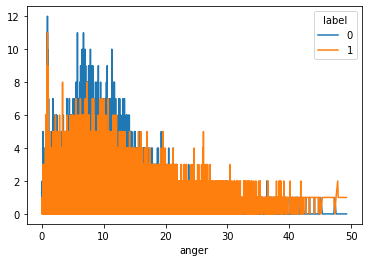

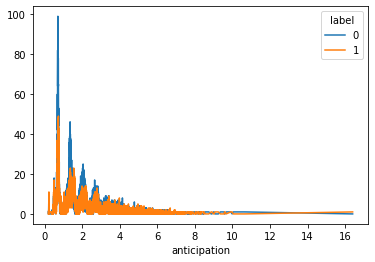

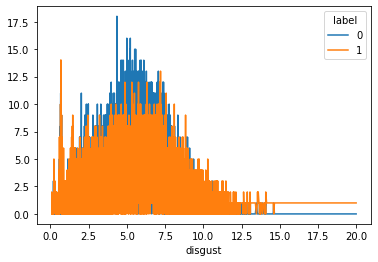

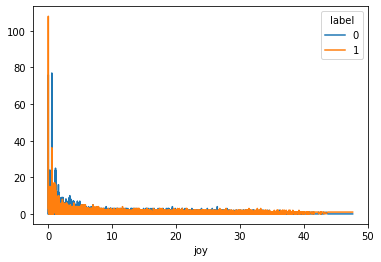

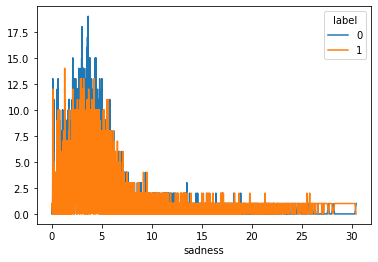

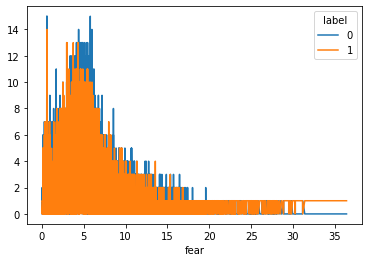

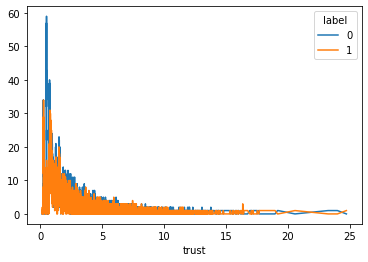

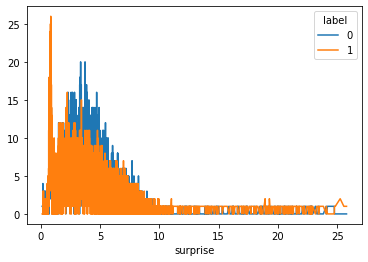

In [ ]:
columns=["anger","anticipation" ,"disgust","joy","sadness","fear","trust","surprise"]
for column in columns:
  dfplot = dfFinal[(dfFinal[[column]] != 0).all(axis=1)]
  # dfplot.info()
  dfplot.groupby([column, 'label']).size().unstack(fill_value=0)[[0,1]].plot()

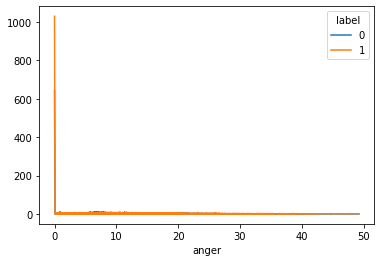

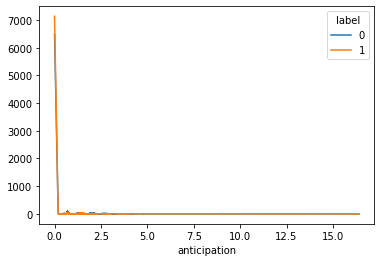

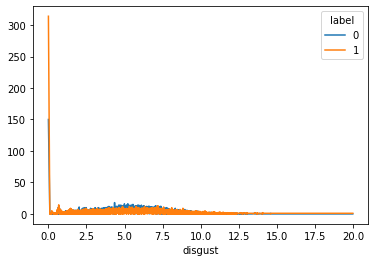

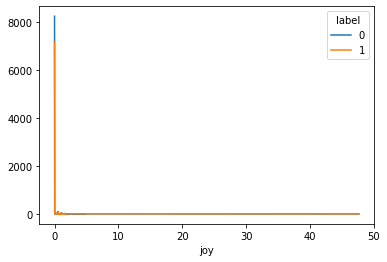

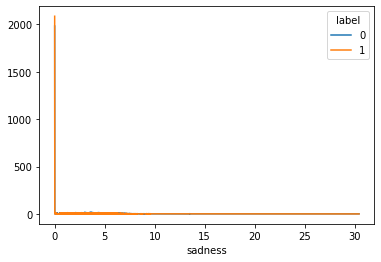

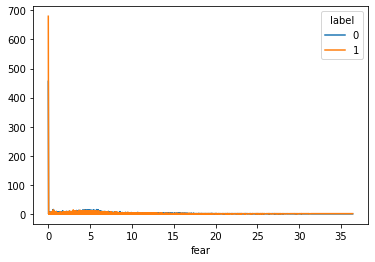

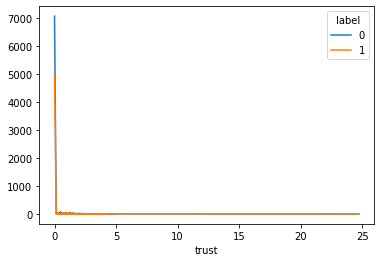

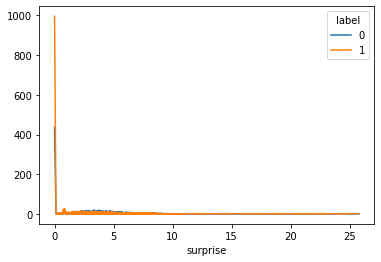

In [ ]:
# columns = ['url_count', 'digit_count', 'number_count', 'stop_words_count', 'punctuations_count', 'nonAscii_count', 'word_count', 'text_len', 'sentence_count']
columns=["anger","anticipation" ,"disgust","joy","sadness","fear","trust","surprise"]
for column in columns:
  dfFinal.groupby([column, 'label']).size().unstack(fill_value=0)[[0,1]].plot()